!pip install opencv-python

In [51]:
import tensorflow as tf
import sys 
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np
import cv2

In [52]:
model = load_model('model/14-0.0673.keras')
#model = load_model('/content/model_cnn/15-0.0595.hdf5')#colab₫ 79
model.summary


<bound method Model.summary of <Sequential name=sequential_17, built=True>>

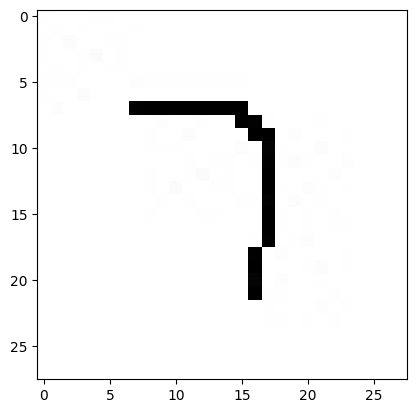

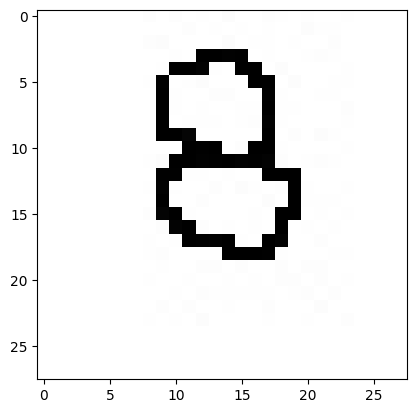

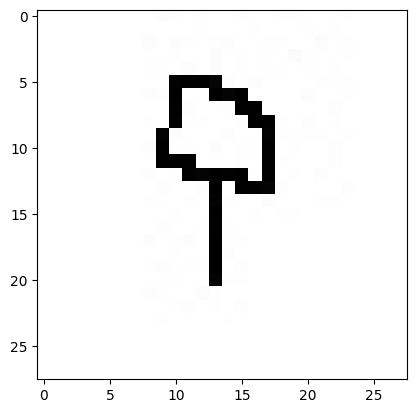

In [53]:
test_num1 = cv2.imread('model/mnist/7.jpg')
test_num2 = cv2.imread('model/mnist/8.jpg')
test_num3 = cv2.imread('model/mnist/9.jpg')
#RGB file을 gray로
test_num1 = cv2.cvtColor(test_num1, cv2.COLOR_BGR2GRAY)
test_num2 = cv2.cvtColor(test_num2, cv2.COLOR_BGR2GRAY)
test_num3 = cv2.cvtColor(test_num3, cv2.COLOR_BGR2GRAY)
#위 과정을 거치면 색상이 반전됨 ->
#아래에서 색상을 다시 반전
test_num1 = 255 - test_num1
test_num2 = 255 - test_num2
test_num3 = 255 - test_num3
plt. imshow(test_num1, cmap='Greys');
plt.show()
plt.imshow(test_num2, cmap='Greys');
plt.show()
plt. imshow(test_num3, cmap='Greys');
plt.show()

In [54]:
test_num1 = test_num1.reshape(1, 784).astype('float64') / 255
test_num2 = test_num2.reshape (1, 784).astype('float64') / 255
test_num3 = test_num3.reshape(1, 784).astype('float64') / 255


In [55]:
#print('The Answer 3 is ', model.predict_classes(test_num1)) #print('The Answer 6 is ', model.predict_classes(test_num2)) #print('The Answer 5 is ', model.predict_classes(test_num3))
#model.predict_classes는 아래 코드와 동일한 역할을 함
test_predict= list()
test_predict.append (model.predict(test_num1))
test_predict.append (model.predict(test_num2))
test_predict.append(model.predict(test_num3))
print( 'The Answer 7 is ', test_predict[0].argmax())
print('The Answer 8 is ', test_predict[1].argmax())
print('The Answer 9 is ', test_predict[2].argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
The Answer 7 is  7
The Answer 8 is  7
The Answer 9 is  9


간략화

In [56]:
from glob import glob
import pathlib
img_path = 'model/mnist'
file_list = glob(img_path + "/*")


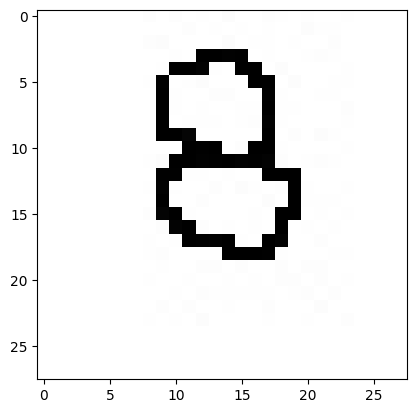

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The Answer of 8 is 7


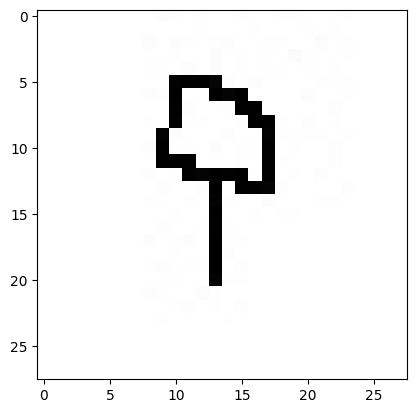

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The Answer of 9 is 9


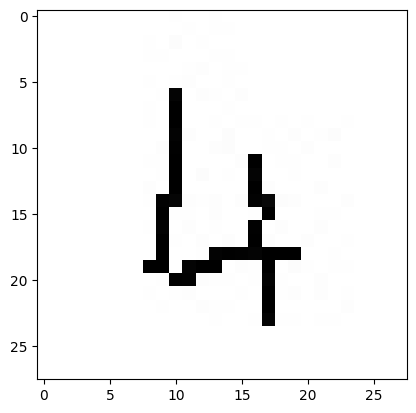

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
The Answer of 4 is 4


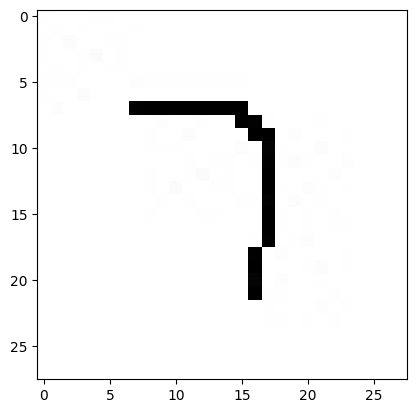

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
The Answer of 7 is 7


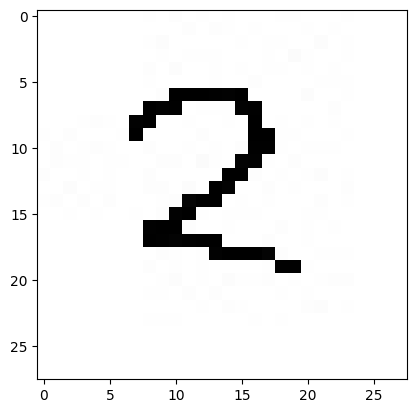

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The Answer of 2 is 3


In [57]:
for pic in file_list:
    test_num = cv2.imread(pic)
    test_num = cv2.cvtColor(test_num, cv2.COLOR_BGR2GRAY)
    test_num = 255 - test_num
    plt. imshow(test_num, cmap='Greys');
    plt.show()

    test_num = test_num.reshape(1, 784).astype('float64') / 255
    test_predict = model.predict(test_num)
    name = pathlib.Path(pic).stem
    print( 'The Answer of', name ,'is', test_predict[0].argmax())
